*********************Nc1c(C(=O)O)cc([N+](=O)[O-])c2c1C(=O)c1ccccc1C2=O*********************
********The most detoxicity substructure combination********
prediction: 0.9516414880752564
label: 1.0
********attribution********


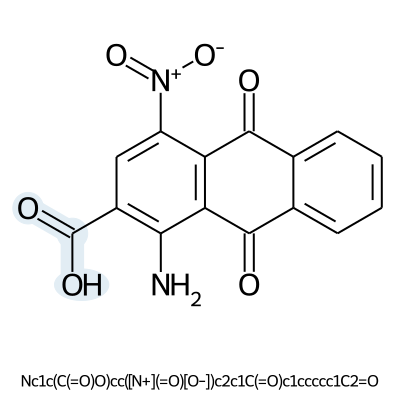

********all_emerge_1********
*********************Nc1c(C(=O)O)cc([N+](=O)[O-])c2c1C(=O)c1ccccc1C2=O*********************
********The most toxic substructure combination********
prediction: 0.9516414880752564
label: 1.0
********attribution********


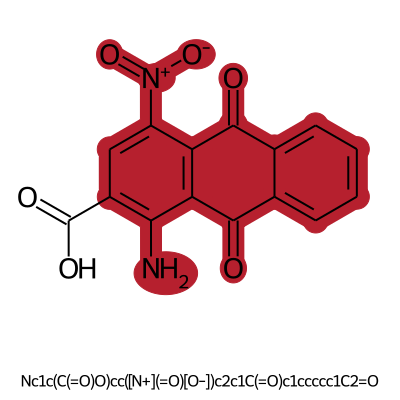

********all_emerge_1********
*********************Cc1ccc(N)cc1[N+](=O)[O-]*********************
********The most detoxicity substructure combination********
prediction: 0.9317831039428712
label: 1.0
********attribution********


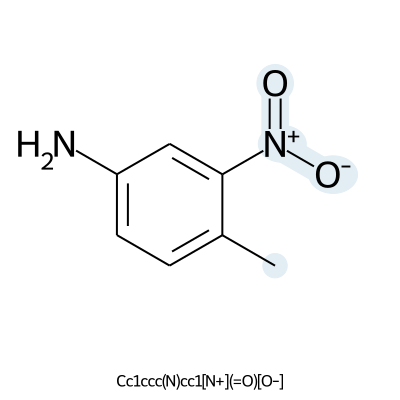

********all_emerge_1********
*********************Cc1ccc(N)cc1[N+](=O)[O-]*********************
********The most toxic substructure combination********
prediction: 0.9317831039428712
label: 1.0
********attribution********


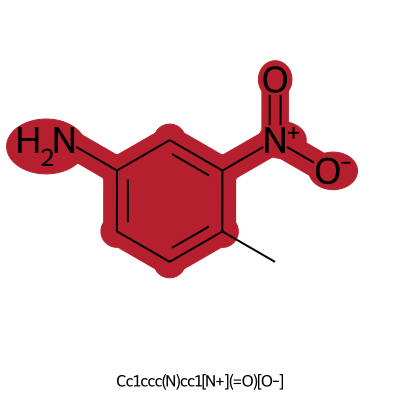

********all_emerge_1********
*********************COc1cc([N+](=O)[O-])ccc1N*********************
********The most detoxicity substructure combination********
prediction: 0.966524302959442
label: 1.0
********attribution********


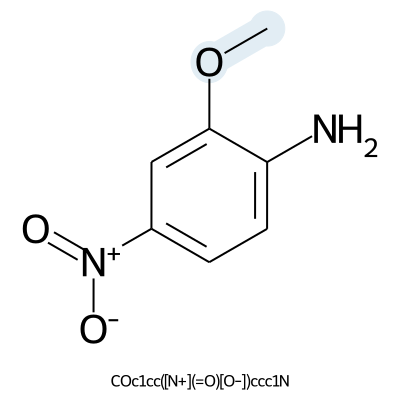

********all_emerge_1********
*********************COc1cc([N+](=O)[O-])ccc1N*********************
********The most toxic substructure combination********
prediction: 0.966524302959442
label: 1.0
********attribution********


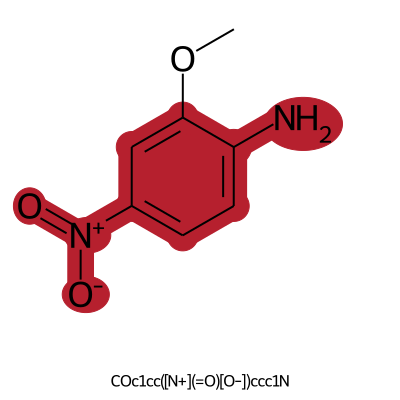

********all_emerge_1********
*********************[N-]=[N+]=Nc1ccc(F)c([N+](=O)[O-])c1*********************
********The most detoxicity substructure combination********
prediction: 0.9957648813724518
label: 1.0
********attribution********


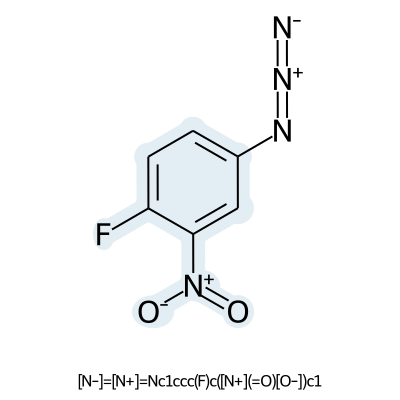

********all_emerge_1********
*********************[N-]=[N+]=Nc1ccc(F)c([N+](=O)[O-])c1*********************
********The most toxic substructure combination********
prediction: 0.9957648813724518
label: 1.0
********attribution********


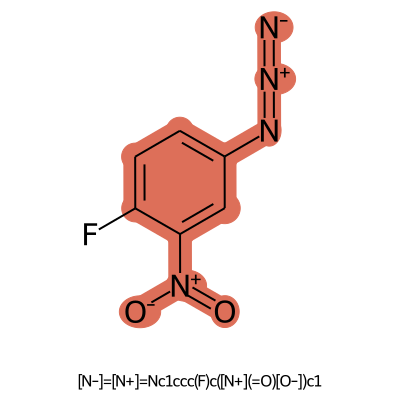

********all_emerge_1********
*********************O=[N+]([O-])c1cc2ccccc2c2ccccc12*********************
********The most detoxicity substructure combination********
prediction: 0.9550516724586486
label: 1.0
********attribution********


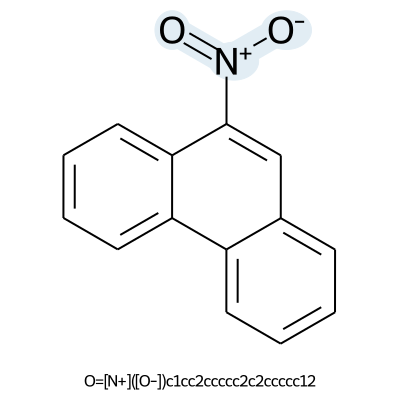

********all_emerge_1********
*********************O=[N+]([O-])c1cc2ccccc2c2ccccc12*********************
********The most toxic substructure combination********
prediction: 0.9550516724586486
label: 1.0
********attribution********


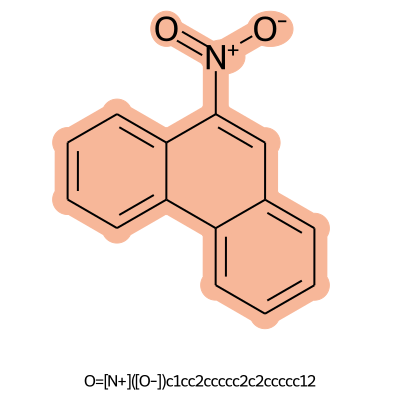

********all_emerge_1********
*********************O=[N+]([O-])c1ccc2c3ccccc3c3cccc4ccc1c2c43*********************
********The most detoxicity substructure combination********
prediction: 0.9766644895076751
label: 1.0
********attribution********


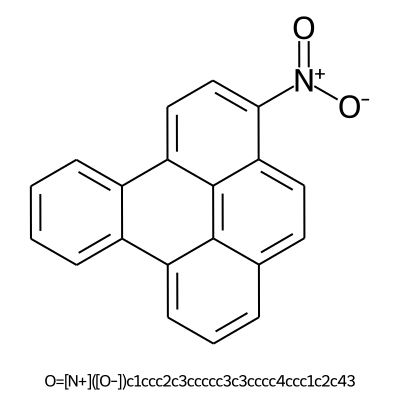

********all_emerge_1********
*********************O=[N+]([O-])c1ccc2c3ccccc3c3cccc4ccc1c2c43*********************
********The most toxic substructure combination********
prediction: 0.9766644895076751
label: 1.0
********attribution********


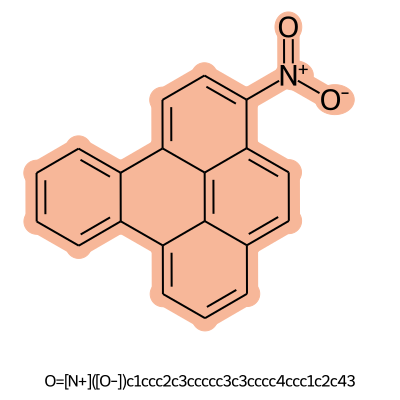

********all_emerge_1********


In [3]:
import pandas as pd
import numpy as np
from utils import atom_attribution_visualize, sub_attribution_visualize, return_atom_and_sub_attribution, return_bond_sub_index, return_smask_index_i, return_atom_and_sub_attribution_emerge
import seaborn as sns 
from IPython.display import Image


task_name = 'Mutagenicity'
selected_fg_group = None
specific_smiles_list = None
specific_smiles_list = ['Nc1c(C(=O)O)cc([N+](=O)[O-])c2c1C(=O)c1ccccc1C2=O', 'Cc1ccc(N)cc1[N+](=O)[O-]','COc1cc([N+](=O)[O-])ccc1N', '[N-]=[N+]=Nc1ccc(F)c([N+](=O)[O-])c1', 'O=[N+]([O-])c1cc2ccccc2c2ccccc12', 'O=[N+]([O-])c1ccc2c3ccccc3c3cccc4ccc1c2c43']

topx = 1

# 只是记录数据的子结构mask情况，这里取seed1的就行
brics_emerge_smask_index_list = [x for x in np.load('../prediction/brics_emerge/{}_brics_emerge_1_train_smask_index.npy'.format(task_name), allow_pickle=True)] + [x for x in np.load('../prediction/brics_emerge/{}_brics_emerge_1_val_smask_index.npy'.format(task_name), allow_pickle=True)] + [x for x in np.load('../prediction/brics_emerge/{}_brics_emerge_1_test_smask_index.npy'.format(task_name), allow_pickle=True)]
murcko_emerge_smask_index_list = [x for x in np.load('../prediction/murcko_emerge/{}_murcko_emerge_1_train_smask_index.npy'.format(task_name), allow_pickle=True)] + [x for x in np.load('../prediction/murcko_emerge/{}_murcko_emerge_1_val_smask_index.npy'.format(task_name), allow_pickle=True)] + [x for x in np.load('../prediction/murcko_emerge/{}_murcko_emerge_1_test_smask_index.npy'.format(task_name), allow_pickle=True)]

# 载入attribution数据
data_brics_emerge = pd.read_csv('../prediction/attribution/{}_{}_attribution_summary.csv'.format(task_name, 'brics_emerge'))
data_murcko_emerge = pd.read_csv('../prediction/attribution/{}_{}_attribution_summary.csv'.format(task_name, 'murcko_emerge'))
# ['-C#CH', '-C#N', '-C(=O)CH3', '-C(=O)N', '-C(=O)O', '-C(=O)OMe', '-CF3', '-N', '-N#N', '-N=C=O', '-N=C=S', '-N=CH2', '-N=N', '-N=NCH3', '-N=O', '-NC(=O)CH3', '-NHSO2CH3', '-NO2', '-O', '-OEt', '-OMe', '-S', '-SCH3', '-SO2CH3', '-SO2Cl', '-SO2NH2', '-SO3CH3', '-SO3H', '-SOCH3', '-X', '-cPropyl', '-tBu', '=N', '=N-O', '=NCH3', '=O', '=S']
if selected_fg_group is not None:
    smiles_list = list(set(data_fg[data_fg['sub_name']==selected_fg_group]['smiles'].tolist()))
if specific_smiles_list is not None:
    smiles_list = specific_smiles_list



for smiles_i in smiles_list:
    # 根据brics骨架拆分分子
    # 获取attribution中smiles_i的碎片index
    brics_emerge_index_i = data_brics_emerge[data_brics_emerge['smiles'] == smiles_i].index.tolist()
    # 根据碎片index获取子碎片mask掉原子的index
    brics_emerge_smask_index_i = return_smask_index_i(brics_emerge_smask_index_list, brics_emerge_index_i)
    # 得到attribution
    brics_emerge_attribution_i = data_brics_emerge[
        data_brics_emerge['smiles'] == smiles_i].attribution_normalized.tolist()
    label = data_brics_emerge[data_brics_emerge['smiles'] == smiles_i].label.tolist()[0]

    # 根据murcko骨架拆分分子
    # 获取attribution中smiles_i的碎片index
    murcko_emerge_index_i = data_murcko_emerge[data_murcko_emerge['smiles'] == smiles_i].index.tolist()
    # 根据碎片index获取子碎片mask掉原子的index
    murcko_emerge_smask_index_i = return_smask_index_i(murcko_emerge_smask_index_list, murcko_emerge_index_i)
    # 得到attribution
    murcko_emerge_attribution_i = data_murcko_emerge[
        data_murcko_emerge['smiles'] == smiles_i].attribution_normalized.tolist()
    label = data_murcko_emerge[data_murcko_emerge['smiles'] == smiles_i].label.tolist()[0]


    # 将brics和murcko放在一起考虑
    all_emerge_attribution_i = brics_emerge_attribution_i + murcko_emerge_attribution_i
    all_emerge_smask_index_i = brics_emerge_smask_index_i + murcko_emerge_smask_index_i
    label = data_murcko_emerge[data_murcko_emerge['smiles'] == smiles_i].label.tolist()[0]
    # top detoxify value  显示疏水性emerge子结构
    all_emerge_attribution_i_sorted = [i for _, i in
                                       sorted(zip(all_emerge_attribution_i, all_emerge_attribution_i),
                                              reverse=False)]
    all_emerge_smask_index_i_sorted = [i for _, i in
                                       sorted(zip(all_emerge_attribution_i, all_emerge_smask_index_i),
                                              reverse=False)]
    # 显示前X的emerge 结果
    all_emerge_n = min([topx, len(all_emerge_attribution_i_sorted)])
    for j in range(all_emerge_n):
        print("*********************{}*********************".format(smiles_i))
        print("********{}********".format('The most detoxicity substructure combination'))
        all_emerge_attribution_list, all_emerge_atom_list, all_emerge_bond_attribution_list, all_emerge_bond_list, \
        all_emerge_ring_attribution_list, all_emerge_ring_list= return_atom_and_sub_attribution_emerge(
            smiles_i, all_emerge_smask_index_i_sorted[j], all_emerge_attribution_i_sorted[j])
        print('prediction:', data_murcko_emerge[data_murcko_emerge['smiles'] == smiles_i].mol_pred_mean.tolist()[0])
        print('label:', data_murcko_emerge[data_murcko_emerge['smiles'] == smiles_i].label.tolist()[0])
        print("********{}********".format('attribution'))
        display(Image(sub_attribution_visualize(smiles_i, all_emerge_attribution_list, all_emerge_bond_attribution_list, 
                                                all_emerge_ring_attribution_list,
                                 all_emerge_atom_list, all_emerge_bond_list, all_emerge_ring_list, cmap_name='RdBu_r')))
        print("********{}_{}********".format('all_emerge', j + 1))

    # top toxic value  显示毒性emerge子结构
    all_emerge_attribution_i_sorted = [i for _, i in
                                       sorted(zip(all_emerge_attribution_i, all_emerge_attribution_i),
                                              reverse=True)]
    all_emerge_smask_index_i_sorted = [i for _, i in
                                       sorted(zip(all_emerge_attribution_i, all_emerge_smask_index_i),
                                              reverse=True)]
    for j in range(all_emerge_n):
        print("*********************{}*********************".format(smiles_i))
        print("********{}********".format('The most toxic substructure combination'))
        all_emerge_attribution_list, all_emerge_atom_list, all_emerge_bond_attribution_list, all_emerge_bond_list, \
        all_emerge_ring_attribution_list, all_emerge_ring_list= return_atom_and_sub_attribution_emerge(
            smiles_i, all_emerge_smask_index_i_sorted[j], all_emerge_attribution_i_sorted[j])
        print('prediction:', data_murcko_emerge[data_murcko_emerge['smiles'] == smiles_i].mol_pred_mean.tolist()[0])
        print('label:', data_murcko_emerge[data_murcko_emerge['smiles'] == smiles_i].label.tolist()[0])
        print("********{}********".format('attribution'))
        display(Image(sub_attribution_visualize(smiles_i, all_emerge_attribution_list, all_emerge_bond_attribution_list,all_emerge_ring_attribution_list,
                                 all_emerge_atom_list, all_emerge_bond_list, all_emerge_ring_list, cmap_name='RdBu_r')))
        print("********{}_{}********".format('all_emerge', j + 1))